# Soil Cracks

Soil cracks emerge as a consequence of the conformational changes in the structure of clay minerals with changes in soil moisture that causes the soil to shrink (while drying) and swell (while wetting). Expansive soils are usually characterized by moderate to high clay content, particularly in soils with high content of montmorillonite, a typical clay in vertisols. Soil cracks can lead to preferential water flow and rapid solute transport to deeper soil layers, and the expansion and contraction cof the soil can have adverse effects on building foundations.

>Montmorillonite can increase fifteen times its dry volume and can exhert an expansive pressure of 150,000 kg per square meter!

From the aesthetic point of view, the seemingly random cracking patterns also result attractive to scientists and enthusiasts interested in fractal patterns.

In this exercise we will identify soil cracks from a digital image using filters to detect tubular structures.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology, filters


In [2]:
# Read image
RGB = io.imread("../datasets/soil_cracks.jpg")


In [3]:
# Display image size
RGB.shape


(3264, 2448, 3)

In [4]:
# Convert RGB to gray scale
BW = color.rgb2gray(RGB)


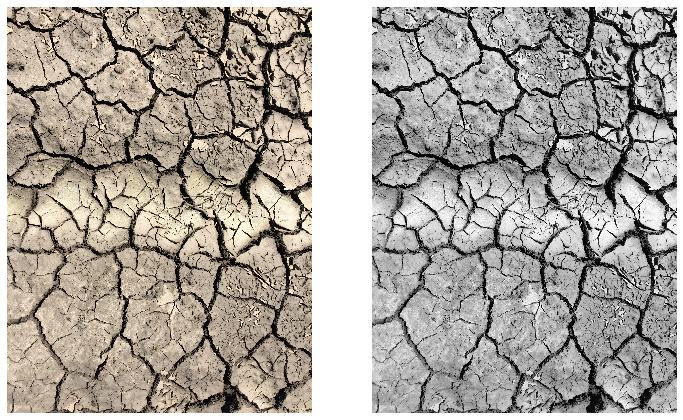

In [5]:
# Compare true color with gray scale image
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW, cmap="gray")
plt.axis('off')

plt.show()


In [6]:
# Sato tubeness filter
BW_sato = filters.sato(BW, sigmas=range(1, 10, 2), black_ridges=True)

# Frangi vesselness filter
BW_frangi = filters.frangi(BW, sigmas=range(1, 10, 2), black_ridges=True)


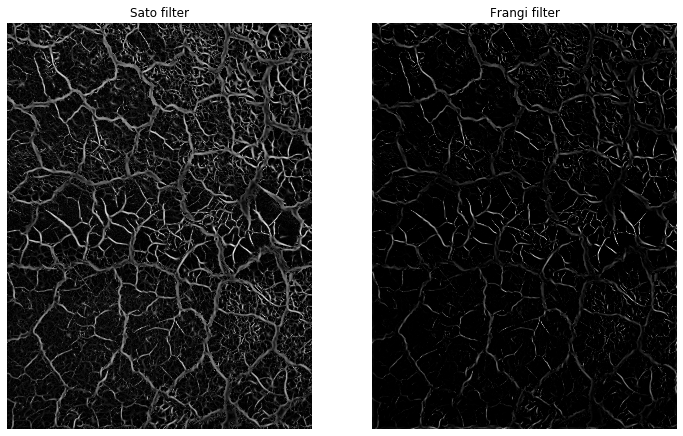

In [18]:
# Compare the Sato and Frangi filters
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Sato filter")
plt.imshow(BW_sato, cmap="gray")
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Frangi filter")
plt.imshow(BW_frangi, cmap="gray")
plt.axis('off')

plt.show()


The Sato filter seems to capture the soil cracks more vividly, although the results strongly depend on the choice of filter paramters. Feel free to go back and re-run the filters with slightly different sigma values. You can also check the official documentation to test additional input arguments to fine tune the filter.

Next we will explore the histograms of filter values. Histograms are useful to detect breaks that can be used to threshold the image. While in this case we could finish at this point, the idea is to remove some of the noise in the classified image andcreate a binary image that encodes each pixel as background or crack.


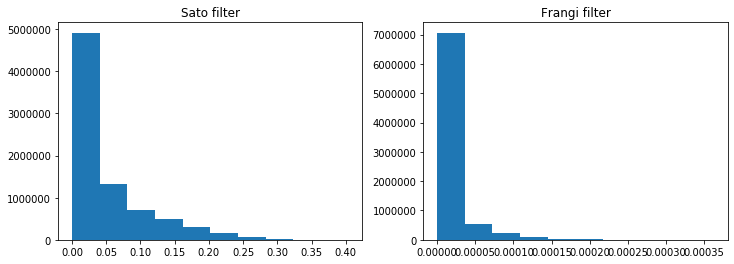

In [8]:
# Plot histograms
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Sato filter')
plt.hist(BW_sato.flatten())

plt.subplot(1,2,2)
plt.title('Frangi filter')
plt.hist(BW_frangi.flatten())

plt.show()


## Denoising image

The top-hat transformation extracts small details from the image based on a the size and shape of a structuring element. So our first step consists of defining a structuring element of a specific shape.


In [9]:
# Generate structuring element (selem)
selem = morphology.disk(4) # Generates an image without noise
print(selem)


[[0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0]]


In [10]:
# De-noise image using the white top-hat transformation
noise = morphology.white_tophat(BW_sato, selem) # Gets the noisy part of the image


In [12]:
# Subtract noise from classified image
BW_sato_clean = BW_sato - noise


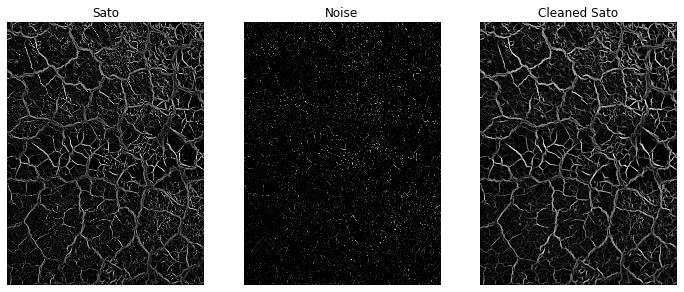

In [13]:
# Compare original filter, noise, and cleaned filter
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('Sato')
plt.imshow(BW_sato, cmap="gray")
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Noise')
plt.imshow(noise, cmap="gray")
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Cleaned Sato')
plt.imshow(BW_sato_clean, cmap="gray")
plt.axis('off')
plt.show()


## Binarize
The process of binaring a gray scale image is to assign a value of either 0 or 1 to each pixel based on its current value. If the gray scale ranges between 0 and 1, the easiest way to binarize the image is to round the numbers. However, this may not produce the desired results in many cases. Using custom thresholds may improve the classification and extraction of the desired features.


In [14]:
# Binarize
idx =  BW_sato_clean > 0.075 
BW_sato_clean[idx] = 1
BW_sato_clean[~idx] = 0


In [15]:
# COmpute percentage of the area occupied by the soil cracks
percentage_cracks = np.sum(BW_sato_clean.flatten()) / BW_sato_clean.size * 100
print('Cracks occupy:',round(percentage_cracks,1), '% of the area.')


Cracks occupy: 19.4 % of the area.


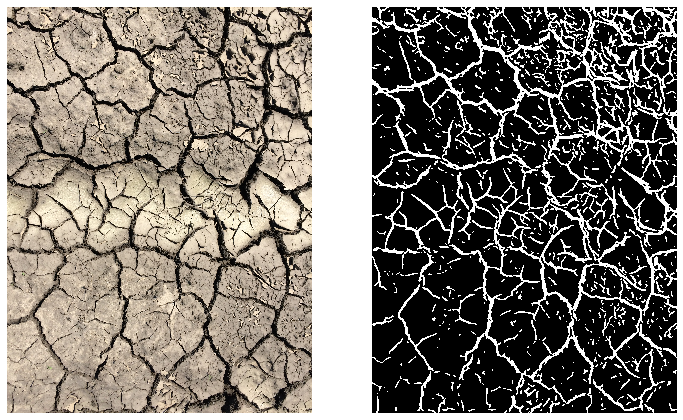

In [16]:
# Show final classification
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(BW_sato_clean, cmap="gray")
plt.axis('off')
plt.show()
